interactive(children=(IntSlider(value=0, description='Subplot:', max=19), Output()), _dom_classes=('widget-int…

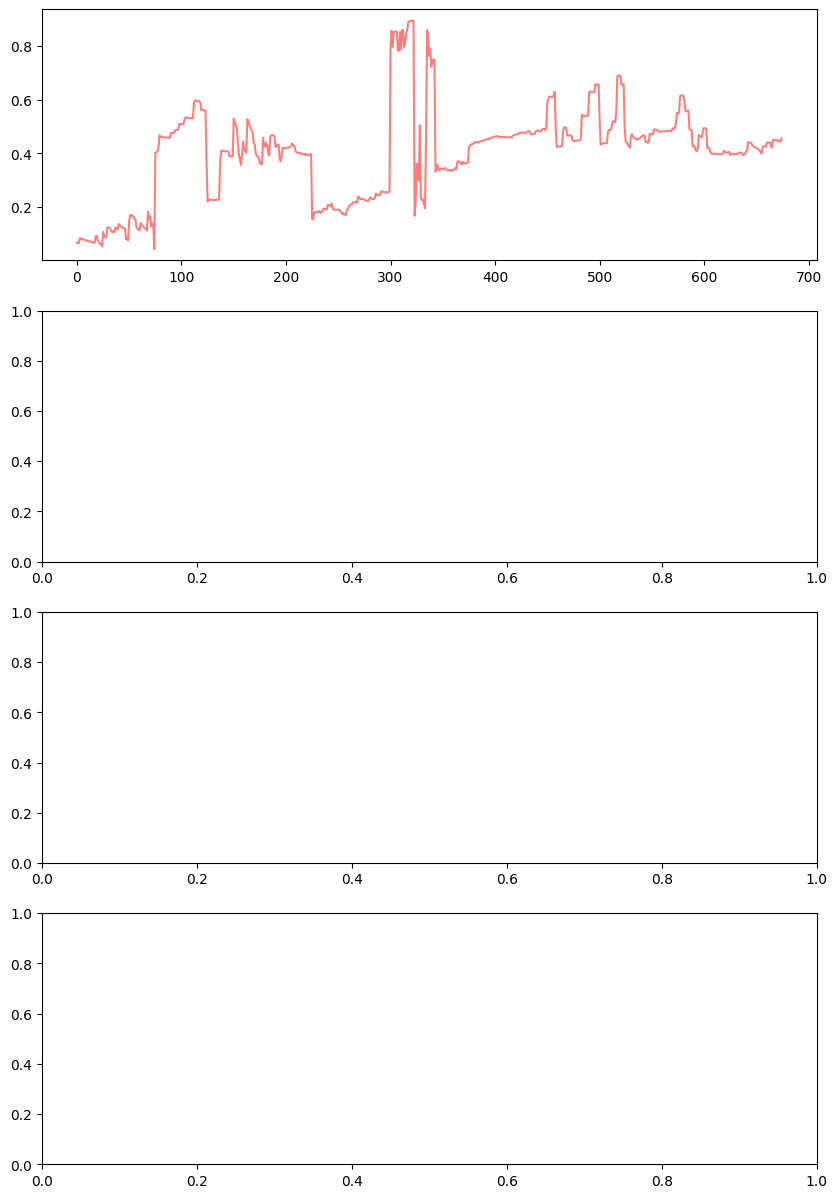

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the folder path once
folder_path = 'results/Desktop/kdd_model/One_out/linear/pretrain/window_size_5sec/feat_dim_2/freeze_False_epoch_5_lr_0.0001_d_hidden_64_d_ff_256_n_heads_8_n_layer_3_pos_encode_learnable_activation_gelu_norm_BatchNorm'

# Load the files using the folder path
mask = np.loadtxt(f'{folder_path}/mask.txt')
y_pred = np.loadtxt(f'{folder_path}/pred.txt')
t_true = np.loadtxt(f'{folder_path}/true.txt')


# Split into x and y coordinates
mask_x = mask[::4]
mask_y = mask[1::4]
mask_x_diff = mask[2::4]
mask_y_diff = mask[3::4]

y_pred_x = y_pred[::4]
y_pred_y = y_pred[1::4]
y_pred_x_diff = y_pred[2::4]
y_pred_y_diff = y_pred[3::4]

t_true_x = t_true[::4]
t_true_y = t_true[1::4]
t_true_x_diff = t_true[2::4]
t_true_y_diff = t_true[3::4]

# Define the number of points per subplot and the number of subplots
points_per_subplot = 900
num_subplots = 20

# Create a function to plot a specific subplot
def plot_subplot(i):
    start = i * points_per_subplot
    end = start + points_per_subplot

    # Create a figure with 2 subplots
    fig, axs = plt.subplots(4, figsize=(10, 15))

    # Plot x-coordinates
    axs[0].plot(t_true_x[start:end], 'r-', label='True', alpha=0.5)
    axs[0].scatter(np.arange(points_per_subplot)[mask_x[start:end]==1], t_true_x[start:end][mask_x[start:end]==1], color='r', alpha=0.5, s=100, label='Masked')
    axs[0].scatter(np.arange(points_per_subplot)[mask_x[start:end]==1], y_pred_x[start:end][mask_x[start:end]==1], color='b', alpha=1, s=50, label='Predicted')
    axs[0].set_title('X-coordinates ({}-{})'.format(start, end))
    axs[0].legend()

    # Plot y-coordinates
    axs[1].plot(t_true_y[start:end], 'r-', label='True', alpha=0.5)
    axs[1].scatter(np.arange(points_per_subplot)[mask_y[start:end]==1], t_true_y[start:end][mask_y[start:end]==1], color='r', alpha=0.5, s=100, label='Masked')
    axs[1].scatter(np.arange(points_per_subplot)[mask_y[start:end]==1], y_pred_y[start:end][mask_y[start:end]==1], color='b', alpha=1, s=50, label='Predicted')
    axs[1].set_title('Y-coordinates ({}-{})'.format(start, end))
    axs[1].legend()
    
    # Plot x-coordinate differences
    axs[2].plot(t_true_x_diff[start:end], 'g-', label='True Diff', alpha=0.5)
    axs[2].scatter(np.arange(points_per_subplot)[mask_x_diff[start:end]==1], t_true_x_diff[start:end][mask_x_diff[start:end]==1], color='g', alpha=0.5, s=100, label='Masked Diff')
    axs[2].scatter(np.arange(points_per_subplot)[mask_x_diff[start:end]==1], y_pred_x_diff[start:end][mask_x_diff[start:end]==1], color='c', alpha=1, s=50, label='Predicted Diff')
    axs[2].set_title('X-coordinate Differences ({}-{})'.format(start, end))
    axs[2].legend()

    # Plot y-coordinate differences
    axs[3].plot(t_true_y_diff[start:end], 'g-', label='True Diff', alpha=0.5)
    axs[3].scatter(np.arange(points_per_subplot)[mask_y_diff[start:end]==1], t_true_y_diff[start:end][mask_y_diff[start:end]==1], color='g', alpha=0.5, s=100, label='Masked Diff')
    axs[3].scatter(np.arange(points_per_subplot)[mask_y_diff[start:end]==1], y_pred_y_diff[start:end][mask_y_diff[start:end]==1], color='c', alpha=1, s=50, label='Predicted Diff')
    axs[3].set_title('Y-coordinate Differences ({}-{})'.format(start, end))
    axs[3].legend()

    # Display the plots
    plt.tight_layout()
    plt.show()

# Create a slider to select the subplot
slider = widgets.IntSlider(min=0, max=num_subplots-1, step=1, description='Subplot:')

# Create an interactive plot viewer
widgets.interactive(plot_subplot, i=slider)
